In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pickle, os

In [2]:
dataset_name = "W16_comb"
df_list = [
           "BES_Panel",
           "BES_reduced_with_na",
#            "BESnumeric"
#            "BES_reduced",
#            "BESnumeric"
          ]

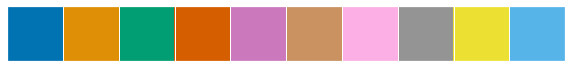

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re
sns.set()
sns.palplot(sns.color_palette("colorblind"))
from IPython.display import display, display_html, HTML

import Jupyter_module_loader
from utility import *
import gaussian_kde


In [4]:
# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
%matplotlib inline
encoding = "ISO-8859-1"

(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()



In [21]:
# %%time
BES_data_folder = "../BES_analysis_data/W16_comb/"
BES_code_folder = "../BES_analysis_code/"
BES_Panel = pd.read_stata(BES_data_folder+"BES2019_W16_Panel_v0.3.dta",convert_categoricals=True, chunksize=1000)
df_chunk = next(BES_Panel)

In [16]:
[x for x in df_chunk.columns if "profile_oslaua" in x]


['profile_oslauaW16', 'profile_oslaua']

In [22]:
column_list = list(df_chunk.columns)
column_list.remove("profile_oslaua")
column_list.remove('profile_oslauaW16')

In [19]:
BES_Panel = pd.read_stata(BES_data_folder+"BES2019_W16_Panel_v0.3.dta",convert_categoricals=True, chunksize=1, columns=column_list)
df_chunk = next(BES_Panel)

In [32]:
df_it = pd.read_stata(BES_data_folder+"BES2019_W16_Panel_v0.3.dta",convert_categoricals=True, chunksize=10000, columns=column_list)
BES_Panel = next(df_it)
count=0
for df_chunk in df_it:
#     if count==1:
#         break
    BES_Panel = BES_Panel.append(df_chunk)
    count=count+1
    print(count)

1
2
3
4
5
6
7
8
9


In [49]:
BES_Panel.to_msgpack(BES_data_folder+"BES2019_W16_Panel_v0.3.msgpack")

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: to_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  """Entry point for launching an IPython kernel.


In [39]:
import numpy.lib
import numpy as np
import pandas as pd
import pickle

def save_pandas(fname, data):
    '''Save DataFrame or Series
    Parameters
    ----------
    fname : str
        filename to use
    data: Pandas DataFrame or Series
    '''
    np.save(open(fname, 'wb'), data)
    if len(data.shape) == 2:
        meta = data.index,data.columns
    elif len(data.shape) == 1:
        meta = (data.index,)
    else:
        raise ValueError('save_pandas: Cannot save this type')
    s = pickle.dumps(meta)
    s = s.encode('string_escape')
    with open(fname, 'a') as f:
        f.seek(0, 2)
        f.write(s)

def load_pandas(fname, mmap_mode='r'):
    '''Load DataFrame or Series
    Parameters
    ----------
    fname : str
        filename
    mmap_mode : str, optional
        Same as numpy.load option
    '''
    values = np.load(fname, mmap_mode=mmap_mode)
    with open(fname) as f:
        numpy.lib.format.read_magic(f)
        numpy.lib.format.read_array_header_1_0(f)
        f.seek(values.dtype.alignment*values.size, 1)
        meta = pickle.loads(f.readline().decode('string_escape'))
    if len(meta) == 2:
        return pd.DataFrame(values, index=meta[0], columns=meta[1])
    elif len(meta) == 1:
        return pd.Series(values, index=meta[0])

In [41]:
gc.collect()
save_pandas(BES_data_folder+"BES2019_W16_Panel_v0.3.msgpack", BES_Panel)

MemoryError: 

In [47]:
BES_Panel.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92587 entries, 0 to 92586
Columns: 6516 entries, id to small_mii_catW10
dtypes: category(6314), datetime64[ns](35), float32(4), float64(142), int32(1), int8(20)
memory usage: 695.0 MB


In [46]:
objects = BES_Panel.columns[BES_Panel.dtypes=="object"]
BES_Panel[objects] = BES_Panel[objects].astype('category')

In [48]:
gc.collect()

0

In [45]:
BES_Panel['wave2ptvW14'].value_counts()

2.0    15590
1.0    15473
Name: wave2ptvW14, dtype: int64

In [6]:
# %%time
# BES_data_folder = "../BES_analysis_data/W16_only/"
# BES_code_folder = "../BES_analysis_code/"
# BES_Panel = pd.read_stata(BES_data_folder+"BES2019_W16_v0.2.dta",convert_categoricals=False, convert_missing=True)

In [7]:

# column_list = list(BES_Panel.columns)
# column_list.remove("profile_oslaua")

# # BES_Panel["profile_oslaua"]

In [8]:
# %%time
# BES_data_folder = "../BES_analysis_data/W16_only/"
# BES_code_folder = "../BES_analysis_code/"
# BES_Panel = pd.read_stata(BES_data_folder+"BES2019_W16_v0.2.dta",columns=column_list)

In [9]:
# BES_Panel.to_msgpack(BES_data_folder+"BES2019_W16_v0.2.msgpack")

In [10]:
BES_data_folder = "../BES_analysis_data/W16_only/"
BES_code_folder = "../BES_analysis_code/"
BES_Panel = pd.read_msgpack(BES_data_folder+"BES2019_W16_v0.2.msgpack")

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\IPython\core\interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
search(BES_Panel,"euroElectionVote")

euroElectionVote            25837
euroElectionVoteNonVoter    12122
dtype: int64

In [ ]:
# pandas.read_stata('cepr_org_2014.dta', convert_categoricals=False, convert_missing=True

In [17]:
search(BES_Panel,"profile")

profile_oslaua                37959
profiles_newspaper2           37959
profile_education_age         37959
profile_ethnicity             37959
profile_lea                   37959
profile_gross_personal        37959
profile_household_size        37959
profile_household_children    37959
profile_newspaper             37959
profile_past_vote_2005        37959
profile_past_vote_2010        37959
profile_religion_denom        37959
profile_pcon                  37959
profile_house_tenure          37959
profile_marital_stat          37959
profile_socgrade              37959
profile_gross_household       37959
profile_religion              37959
profile_past_vote_2017        37959
profile_turnout_2017          37959
profile_past_vote_2015        37959
profile_turnout_2015          37959
profile_eurefvote             37959
profile_eurefturnout          37959
profile_scotref_turnout       37959
profile_scotref_vote          37959
dtype: int64